## Data Preprocessing Template

### Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Importing the dataset

In [3]:
df_train = pd.read_csv('/home/tasnima/jupyter/Project Forecasting/demand-forecasting-kernels-only/train.csv')
df_test = pd.read_csv('/home/tasnima/jupyter/Project Forecasting/demand-forecasting-kernels-only/test.csv')

In [4]:
df_train.head(5)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [5]:
df_test.head(5)

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [6]:
df_train.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [7]:
df_test.isnull().sum()

id       0
date     0
store    0
item     0
dtype: int64

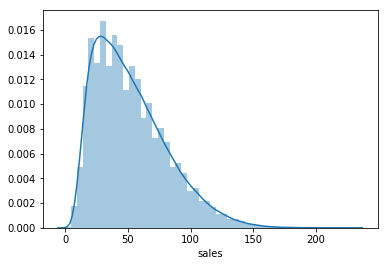

In [8]:
sns.distplot(df_train['sales'])

### import datetime class from datetime module

In [9]:
from datetime import datetime

### Create date object in given time format yyyy-mm-dd

In [10]:
df_train['date'] = pd.to_datetime(df_train['date'], infer_datetime_format=True)
df_test['date'] = pd.to_datetime(df_test['date'], infer_datetime_format=True)

df_train.set_index(pd.DatetimeIndex(df_train['date']), inplace=True)
df_test.set_index(pd.DatetimeIndex(df_test['date']), inplace=True)

"""df_train['date'] = df_train.set_index(df_train['date'], append = False)
df_train['date'] = df_train.index.to_julian_date()

df_test['date'] = df_test.set_index(df_test['date'], append = False)
df_test['date'] = df_test.index.to_julian_date()"""

"df_train['date'] = df_train.set_index(df_train['date'], append = False)\ndf_train['date'] = df_train.index.to_julian_date()\n\ndf_test['date'] = df_test.set_index(df_test['date'], append = False)\ndf_test['date'] = df_test.index.to_julian_date()"

In [11]:
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['week'] = df_train['date'].dt.week
df_train['weekofyear'] = df_train['date'].dt.weekofyear
df_train['dayofweek'] = df_train['date'].dt.dayofweek
df_train['weekday'] = df_train['date'].dt.weekday
df_train['dayofyear'] = df_train['date'].dt.dayofyear
df_train['quarter'] = df_train['date'].dt.quarter
df_train['is_month_start'] = df_train['date'].dt.is_month_start
df_train['is_month_end'] = df_train['date'].dt.is_month_end
df_train['is_quarter_start'] = df_train['date'].dt.is_quarter_start
df_train['is_quarter_end'] = df_train['date'].dt.is_quarter_end
df_train['is_year_start'] = df_train['date'].dt.is_year_start
df_train['is_year_end'] = df_train['date'].dt.is_year_end

categorical_var = ['is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end', 'is_year_start', 
                  'is_year_start', 'is_year_end']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train[categorical_var] = df_train[categorical_var].apply(lambda col: le.fit_transform(col))
#print(df_train[categorical_var].head(5))

sales = df_train['sales']
df_train = df_train.drop('sales', axis=1)
df_train = df_train.drop('date', axis=1)
df_train.head(5)

,store,item,year,month,day,week,weekofyear,dayofweek,weekday,dayofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
date,,,,,,,,,,,,,,,,,
2013-01-01,1,1,2013,1,1,1,1,1,1,1,1,1,0,1,0,1,0
2013-01-02,1,1,2013,1,2,1,1,2,2,2,1,0,0,0,0,0,0
2013-01-03,1,1,2013,1,3,1,1,3,3,3,1,0,0,0,0,0,0
2013-01-04,1,1,2013,1,4,1,1,4,4,4,1,0,0,0,0,0,0
2013-01-05,1,1,2013,1,5,1,1,5,5,5,1,0,0,0,0,0,0


In [12]:
from sklearn.preprocessing import OneHotEncoder
from numpy import array
# define example
data_store = df_train['store']
data_item = df_train['item']
values_store = array(data_store)
values_item = array(data_item)
# integer encode
label_encoder = LabelEncoder()
integer_encoded_store = label_encoder.fit_transform(values_store)
integer_encoded_item = label_encoder.fit_transform(values_item)
# binary encode
onehot_encoder_store = OneHotEncoder(sparse=False, categories = 'auto')
onehot_encoder_item = OneHotEncoder(sparse=False, categories = 'auto')
integer_encoded_store = integer_encoded_store.reshape(len(integer_encoded_store), 1)
integer_encoded_item = integer_encoded_item.reshape(len(integer_encoded_item), 1)
onehot_encoded_store = onehot_encoder_store.fit_transform(integer_encoded_store)
onehot_encoded_item = onehot_encoder_item.fit_transform(integer_encoded_item)
#print(type(onehot_encoded_item))

In [13]:
df_train_store = pd.DataFrame(onehot_encoded_store, dtype=int)
df_train_item = pd.DataFrame(onehot_encoded_item, dtype=int)
df_train.reset_index(inplace=True, drop=True)
df_train_store = pd.DataFrame(onehot_encoded_store, columns = list('ASDFGHJKLP'))
df_train_item = pd.DataFrame(onehot_encoded_item)
df_train = pd.concat([df_train_store, df_train_item, df_train], axis=1)

df_train = df_train.drop('store', axis=1)
df_train = df_train.drop('item', axis=1)
#df_train

In [14]:
df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day
df_test['week'] = df_test['date'].dt.week
df_test['weekofyear'] = df_test['date'].dt.weekofyear
df_test['dayofweek'] = df_test['date'].dt.dayofweek
df_test['weekday'] = df_test['date'].dt.weekday
df_test['dayofyear'] = df_test['date'].dt.dayofyear
df_test['quarter'] = df_test['date'].dt.quarter
df_test['is_month_start'] = df_test['date'].dt.is_month_start
df_test['is_month_end'] = df_test['date'].dt.is_month_end
df_test['is_quarter_start'] = df_test['date'].dt.is_quarter_start
df_test['is_quarter_end'] = df_test['date'].dt.is_quarter_end
df_test['is_year_start'] = df_test['date'].dt.is_year_start
df_test['is_year_end'] = df_test['date'].dt.is_year_end

categorical_var = ['is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end', 'is_year_start', 
                  'is_year_start', 'is_year_end']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test[categorical_var] = df_test[categorical_var].apply(lambda col: le.fit_transform(col))

id = df_test['id']
df_test = df_test.drop('id', axis=1)
df_test = df_test.drop('date', axis=1)
df_test.head(5)

,store,item,year,month,day,week,weekofyear,dayofweek,weekday,dayofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
date,,,,,,,,,,,,,,,,,
2018-01-01,1,1,2018,1,1,1,1,0,0,1,1,1,0,1,0,1,0
2018-01-02,1,1,2018,1,2,1,1,1,1,2,1,0,0,0,0,0,0
2018-01-03,1,1,2018,1,3,1,1,2,2,3,1,0,0,0,0,0,0
2018-01-04,1,1,2018,1,4,1,1,3,3,4,1,0,0,0,0,0,0
2018-01-05,1,1,2018,1,5,1,1,4,4,5,1,0,0,0,0,0,0


In [15]:
# define example
data_store = df_test['store']
data_item = df_test['item']
values_store = array(data_store)
values_item = array(data_item)
# integer encode
label_encoder = LabelEncoder()
integer_encoded_store = label_encoder.fit_transform(values_store)
integer_encoded_item = label_encoder.fit_transform(values_item)
# binary encode
onehot_encoder_store = OneHotEncoder(sparse=False, categories = 'auto')
onehot_encoder_item = OneHotEncoder(sparse=False, categories = 'auto')
integer_encoded_store = integer_encoded_store.reshape(len(integer_encoded_store), 1)
integer_encoded_item = integer_encoded_item.reshape(len(integer_encoded_item), 1)
onehot_encoded_store = onehot_encoder_store.fit_transform(integer_encoded_store)
onehot_encoded_item = onehot_encoder_item.fit_transform(integer_encoded_item)
#print(type(onehot_encoded_item))

In [16]:
df_test_store = pd.DataFrame(onehot_encoded_store, dtype=int)
df_test_item = pd.DataFrame(onehot_encoded_item, dtype=int)
df_test.reset_index(inplace=True, drop=True)
df_test_store = pd.DataFrame(onehot_encoded_store, columns = list('ASDFGHJKLP'))
df_test_item = pd.DataFrame(onehot_encoded_item)
df_test = pd.concat([df_test_store, df_test_item, df_test], axis=1)

df_test = df_test.drop('store', axis=1)
df_test = df_test.drop('item', axis=1)
#df_test

In [17]:
X = df_train.iloc[:, :].values
y = sales

### Splitting the dataset into the Training set and Test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Convolutional Neural Network

### Reshape features

In [19]:
X_train_series = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_series = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Test set shape', X_test_series.shape)

Train set shape (730400, 75, 1)
Test set shape (182600, 75, 1)


### Model Creation

### import libraries for CNN

In [20]:
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [21]:
epochs = 10
batch = 256
lr = 0.0003
adam = optimizers.Adam(lr)

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation = 'relu', input_shape = (X_train_series.shape[1], X_train_series.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(loss = 'mse', optimizer = adam)
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [23]:
lstm_history = model_lstm.fit(X_train_series, y_train, validation_data = (X_test_series, y_test),
                            epochs = epochs, verbose = 2)

Instructions for updating:
Use tf.cast instead.
Train on 730400 samples, validate on 182600 samples
Epoch 1/10
 - 631s - loss: 10890986.3853 - val_loss: 691.2117
Epoch 2/10
 - 642s - loss: 46904379.3230 - val_loss: 705.5342
Epoch 3/10
 - 665s - loss: 700.5777 - val_loss: 685.5362
Epoch 4/10
 - 657s - loss: 2067354.8203 - val_loss: 707.2215
Epoch 5/10
 - 631s - loss: 784.3511 - val_loss: 711.2049
Epoch 6/10
 - 648s - loss: 48495.7051 - val_loss: 799.1421
Epoch 7/10
 - 639s - loss: 1072.7356 - val_loss: 817.3466
Epoch 8/10
 - 640s - loss: 123366893066.9700 - val_loss: 801.9539
Epoch 9/10
 - 631s - loss: 777.4708 - val_loss: 756.0393
Epoch 10/10
 - 620s - loss: 799.7846 - val_loss: 759.3470


In [24]:
df_test_series = df_test.values.reshape((df_test.shape[0], df_test.shape[1], 1))

In [26]:
test_predict = model_lstm.predict(df_test_series, batch_size = batch, verbose = 0)
test_predict = test_predict.flatten()

In [27]:
submission = pd.DataFrame({'id': id, 'sales': test_predict.astype(np.int32)})
submission.to_csv('submission_extra_features_all_categorical_rnn.csv', index=False)

In [32]:
from sklearn.metrics import mean_absolute_error

X_test_series = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
test_predict_train = model_lstm.predict(X_test_series, batch_size = batch, verbose = 0)
test_predict = test_predict.flatten()

mae = mean_absolute_error(y_test, test_predict_train)
mae

22.484426679078485